In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("raw_data/final_dataset.csv")

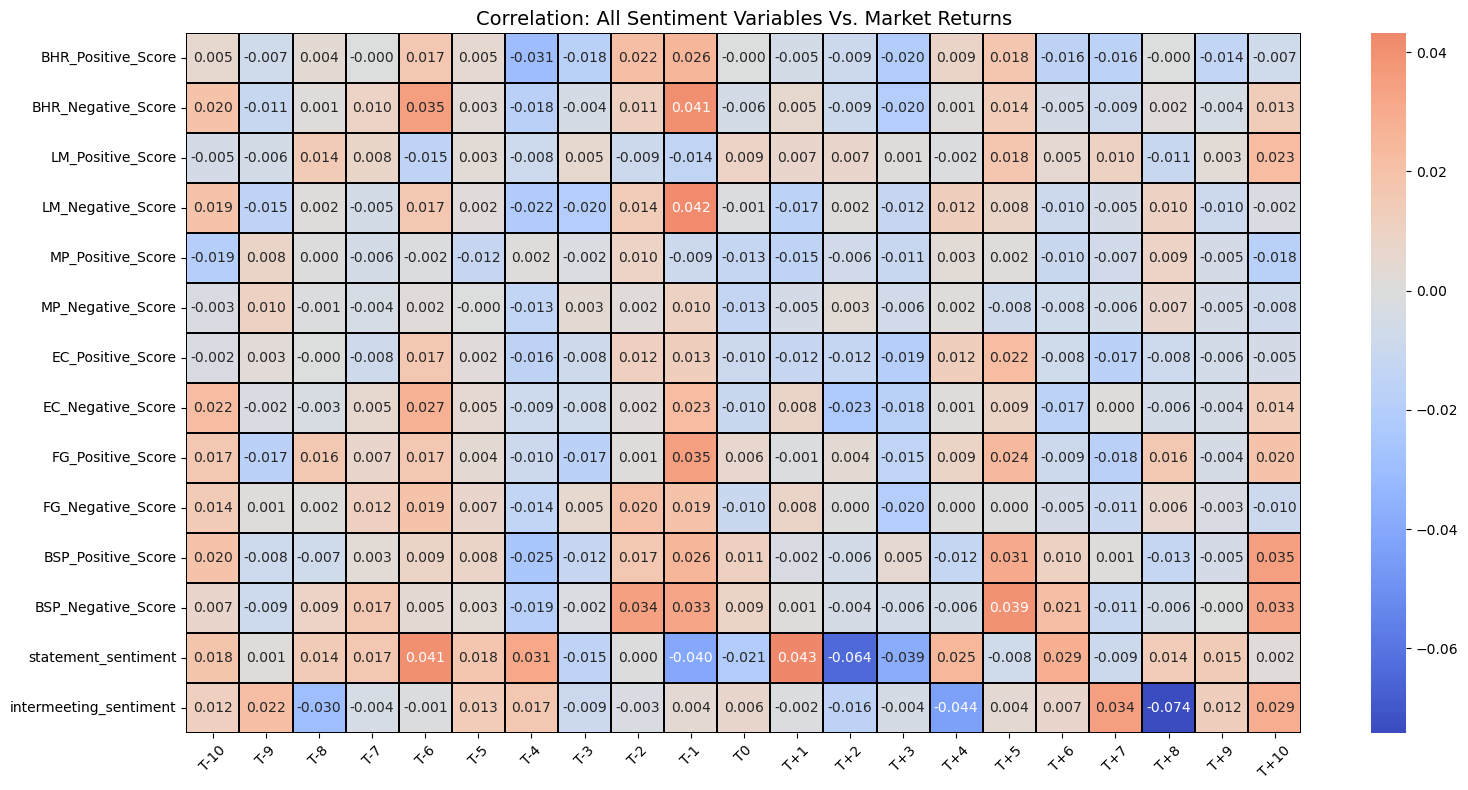

In [10]:
sentiment_col = [col for col in df.columns if 'sentiment' in col or '_Score' in col]
return_col = [col for col in df.columns if col.startswith('T') and col[1:].replace('+', '').replace('-', '').isdigit()]

corr_matrix = df[sentiment_col + return_col].corr()
sentiment_vs_returns = corr_matrix.loc[sentiment_col, return_col]

plt.figure(figsize=(16, 8))
sns.heatmap(
    sentiment_vs_returns,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    linewidths=0.3,
    linecolor='black',
    cbar=True
)
plt.title("Correlation: All Sentiment Variables Vs. Market Returns", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Analysis
- Most correlations are very small between -0.05 and 0.05
    - Shows a weak relationship between sentiment scores and market returns
- T0 and T+1 days show slightly stronger reactions
    - Maybe the market responds quickly to announcements

Machine Learning Models Positive and Negative Sentiment (BHR and LM):
- BHR Negative Score shows small positive correlations at T-6 and T-1
    - Maybe shows early market reactions to negative sentiment
- LM Negative Score shows the strongish correlation at T0 and T+1
    - Maybe the model’s negative language might align with immediate market response

Monetary Policy (MP):
- MP Negative Score shows a small bump at T0
    - Maybe slight market sensitivity to negative monetary language
- MP Positive Score has no clear effect around the date of release

Economic Conditions (EC):
- EC Negative Score has small positive correlations around T0–T-2

Forward Guidance (FG):
- FG Positive/Negative Score shows a mild effect at T0 and T+1
    - Maybe some short-term optimism in the market

Balance Sheet Policy (BSP):
- BSP Negative/Positive Score has stronger correlations right before the release

Overall Sentiment Scores:
- Statement Sentiment shows pretty noticible changes throughout jumping around both positive and negative 
- Intermeeting Sentiment does a similar thing but also has some lagged effects, with spikes at T+4, T+7, and T-8

In [11]:
# Need some on specific indicies and then alternate around between different indicies and see those corelations